In [1]:
import numpy as np 
from modules.surfaceintegration import *
from modules.polarizationtransport import *
from modules.starcatalog import *
import matplotlib.pyplot as plt

In [2]:
# create a class for observation
'''
Am observation class represents a single observation of a given neutron star, 
for a specific phase range (in radians), at a given energy.
'''
class observation:
    def __init__(self, star, phaseRange, E):
        
        stokesParamComputed = [stokes(m, star, E, res='low') for m in phaseRange]
        stokesOutput = np.transpose(stokesParamComputed)
    
        # Computed Stokes Parameters
        self.FQ = stokesOutput[0]
        self.FU = stokesOutput[1]
        
        totalI = [F_I(m, star, E, res='low') for m in phaseRange]
        
        # Total Intensity
        self.I = totalI

In [3]:
# Initializing Arrays
phaseRange = np.arange(0, 2*np.pi, 0.05)

In [4]:
#Graph Parameters
plt.rcParams['figure.figsize'] = 10, 7
plt.rc('text', usetex=False)
plt.rcParams.update({'font.size': 15,
                     'legend.fontsize': 15})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['lines.linewidth'] = 1.5

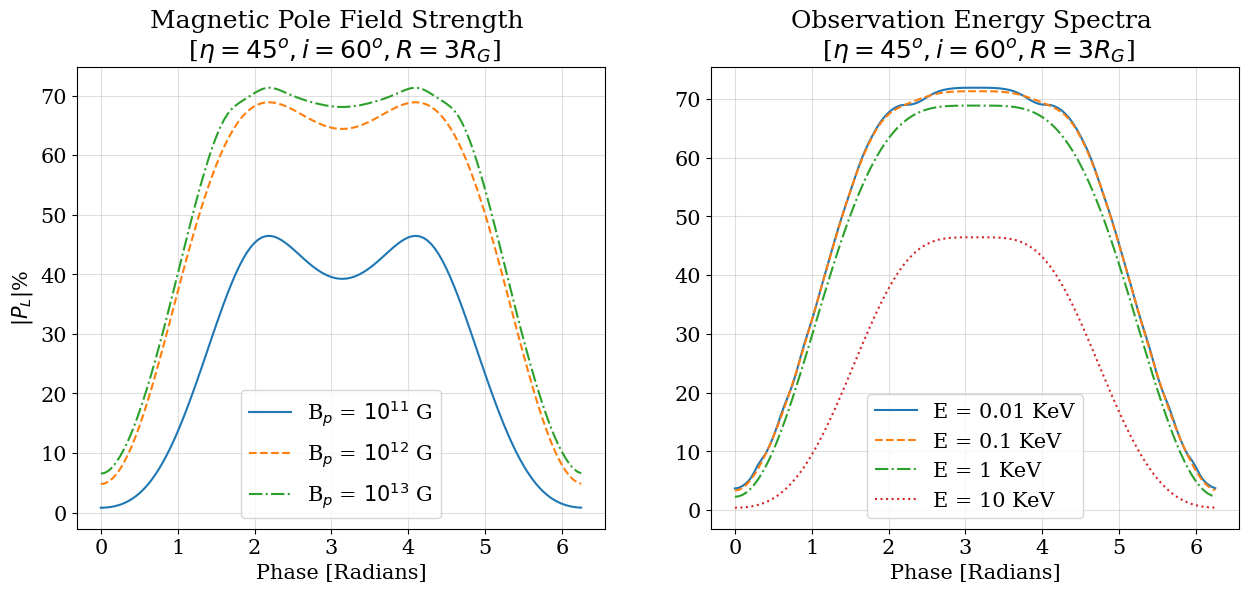

In [6]:
'''
Polarization dependance on Magnetic Field Strength at the Poles and Observation Spectra
'''

#############################################
### RUNNING THE COMPUTATION FOR EACH STAR ###
#############################################

# Field Dependance

# Obs14 = observation(NS14, phaseRange, 1)
# Obs15 = observation(NS15, phaseRange, 1)
# Obs16 = observation(NS16, phaseRange, 1)

# # Spectra Dependance

# Obs17 = observation(NS13, phaseRange, 0.01)
# Obs18 = observation(NS13, phaseRange, 0.1)
# Obs19 = observation(NS13, phaseRange, 1)
# Obs20 = observation(NS13, phaseRange, 10)

#############################################
########### PLOTTING THE RESULTS ############
#############################################

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(phaseRange, Obs14.FQ/Obs14.I *100, label='B$_p$ = $10^{11}$ G')
ax1.plot(phaseRange, Obs15.FQ/Obs15.I*100, '--', label='B$_p$ = $10^{12}$ G')
ax1.plot(phaseRange, Obs16.FQ/Obs16.I*100, '-.', label='B$_p$ = $10^{13}$ G')
ax1.legend()
ax1.grid(alpha=0.4)
ax1.set_xlabel("Phase [Radians]")
ax1.set_ylabel(r"$|P_L|$%")
ax1.set_title('Magnetic Pole Field Strength \n [$\eta = 45^o, i = 60^o, R =3R_G$]', size=18)

ax2.plot(phaseRange, Obs17.FQ/Obs17.I *100, label='E = 0.01 KeV')
ax2.plot(phaseRange, Obs18.FQ/Obs18.I*100, '--', label='E = 0.1 KeV')
ax2.plot(phaseRange, Obs19.FQ/Obs19.I*100, '-.', label='E = 1 KeV')
ax2.plot(phaseRange, Obs20.FQ/Obs20.I*100, ':', label='E = 10 KeV')
ax2.legend()
ax2.grid(alpha=0.4)
ax2.set_xlabel("Phase [Radians]")
ax2.set_title('Observation Energy Spectra \n [$\eta = 45^o, i = 60^o, R =3R_G$]', size=18)

plt.savefig('fig/ParameterDependance.png', dpi=300, bbox_inches='tight')



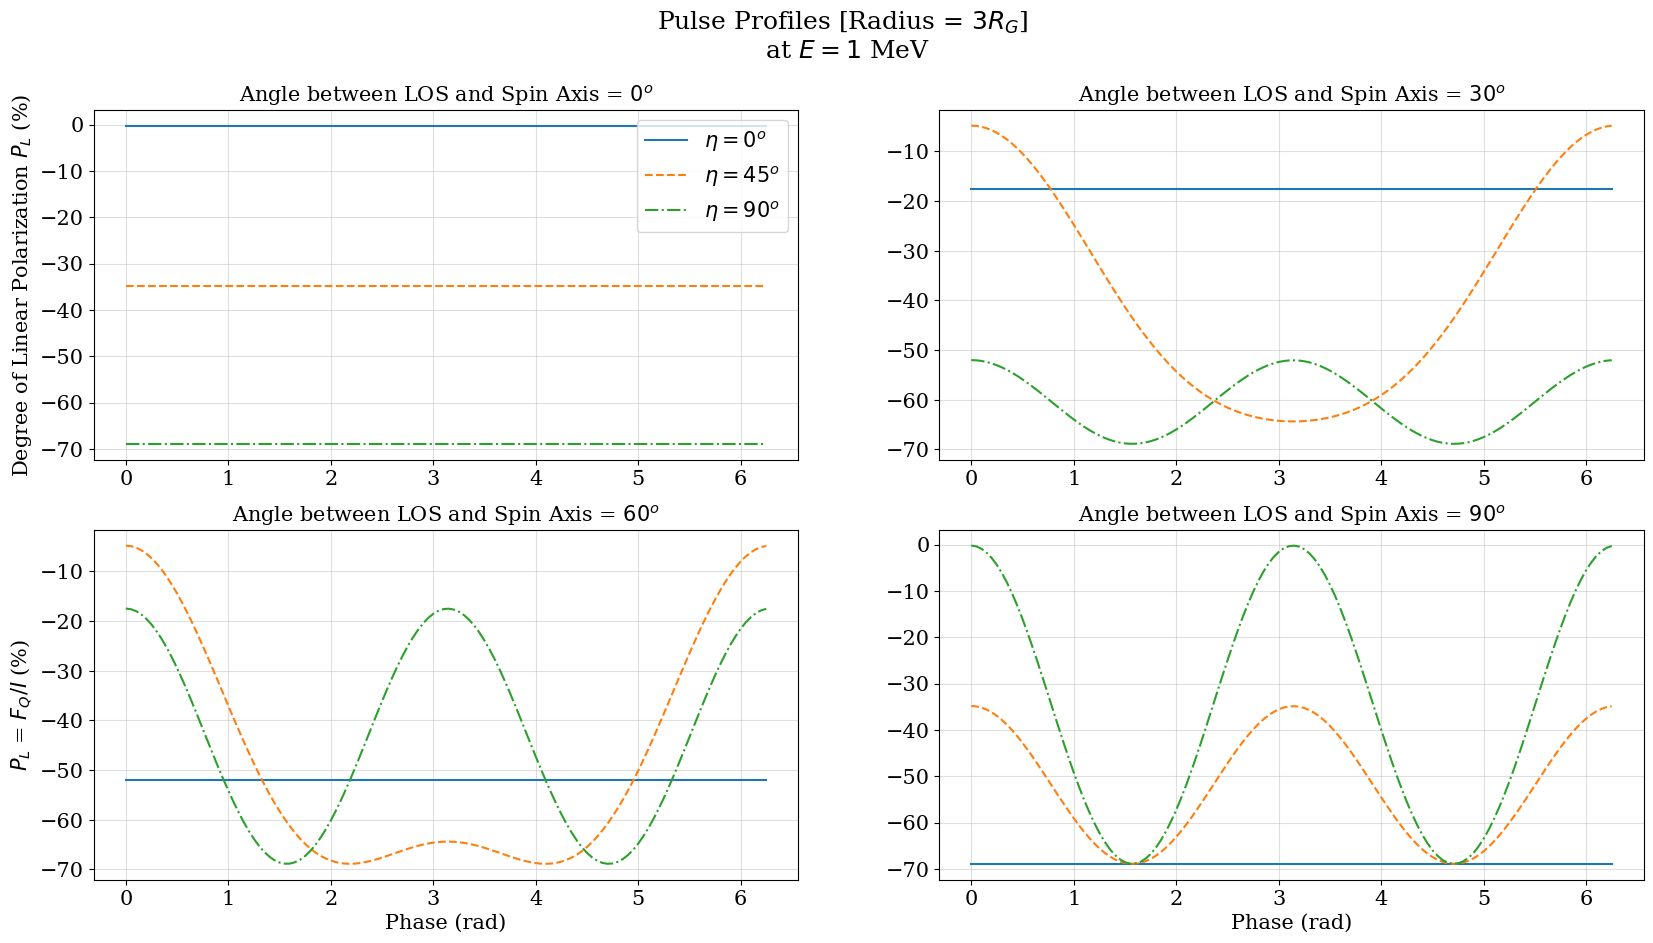

In [22]:
'''
Polarization dependance on angle between LOS and magnetic axis 
and angle between LOS and spin axis
'''

#############################################
### RUNNING THE COMPUTATION FOR EACH STAR ###
#############################################

# Obs1 = observation(NS1, phaseRange, 1)
# Obs2 = observation(NS2, phaseRange, 1)
# Obs3 = observation(NS3, phaseRange, 1)

# Obs4 = observation(NS4, phaseRange, 1)
# Obs5 = observation(NS5, phaseRange, 1)
# Obs6 = observation(NS6, phaseRange, 1)

# Obs7 = observation(NS7, phaseRange, 1)
# Obs8 = observation(NS8, phaseRange, 1)
# Obs9 = observation(NS9, phaseRange, 1)

# Obs10 = observation(NS10, phaseRange, 1)
# Obs11= observation(NS11, phaseRange, 1)
# Obs12 = observation(NS12, phaseRange, 1)

#############################################
########### PLOTTING THE RESULTS ############
#############################################

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

ax1.plot(phaseRange, -Obs1.FQ/Obs1.I*100, label=r'$\eta = 0^o$')
ax1.plot(phaseRange, -Obs2.FQ/Obs2.I*100, '--', label=r'$\eta = 45^o$')
ax1.plot(phaseRange, -Obs3.FQ/Obs3.I*100, '-.', label=r'$\eta = 90^o$')
ax1.set_ylabel(r'Degree of Linear Polarization $P_L$ (%)')
ax1.set_title(r'Angle between LOS and Spin Axis = $0^o$')
ax1.legend()
ax1.grid(alpha=0.4)

ax2.plot(phaseRange, -Obs4.FQ/Obs4.I*100, label=r'$\eta = 0^o$')
ax2.plot(phaseRange, -Obs5.FQ/Obs5.I*100, '--', label=r'$\eta = 45^o$')
ax2.plot(phaseRange, -Obs6.FQ/Obs6.I*100, '-.', label=r'$\eta = 90^o$')
ax2.set_title(r'Angle between LOS and Spin Axis = $30^o$')
ax2.grid(alpha=0.4)

ax3.plot(phaseRange, -Obs7.FQ/Obs7.I*100, label=r'$\eta = 0^o$')
ax3.plot(phaseRange, -Obs8.FQ/Obs8.I*100, '--', label=r'$\eta = 45^o$')
ax3.plot(phaseRange, -Obs9.FQ/Obs9.I*100, '-.', label=r'$\eta = 90^o$')
ax3.set_xlabel(r'Phase (rad)')
ax3.set_title(r'Angle between LOS and Spin Axis = $60^o$')
ax3.grid(alpha=0.4)
ax3.set_ylabel(r'$P_L$ = $F_Q/I$ (%)')

ax4.plot(phaseRange, -Obs10.FQ/Obs10.I*100, label=r'$\eta = 0^o$')
ax4.plot(phaseRange, -Obs11.FQ/Obs11.I*100, '--', label=r'$\eta = 45^o$')
ax4.plot(phaseRange, -Obs12.FQ/Obs12.I*100, '-.', label=r'$\eta = 90^o$')
ax4.set_xlabel(r'Phase (rad)')
ax4.set_title(r'Angle between LOS and Spin Axis = $90^o$')
ax4.grid(alpha=0.4)

fig.suptitle('Pulse Profiles [Radius = $3R_G$] \n at $E = 1$ MeV', fontsize=18)
plt.savefig('fig/PolarizationTransport.png', dpi=300, bbox_inches='tight')

